## Airline Passenger Satisfaction Data Analysis and Visualisation Project
**Team #27:** [Maryna Kostiuk](https://github.com/samamaryna), [Ying Li](https://github.com/yingliamanda), [Yinglin Zhang](https://github.com/Jolin0101), [Tetiana Nurkanova](https://github.com/nurkanovat)

Welcome to our second team project within Data Science Certificate. For this project we used the dataset [Airline Passenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction). Within this project we will analyse data and answer four questions: 
- What percentage of airline passengers are satisfied?
- question 2
- Does flight distance affect customer preferences or flight patterns?
- Which factors contribute to customer satisfaction the most? What about dissatisfaction?


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [55]:
# import dataset into df and take a look at the first 5 rows of the data:

df = pd.read_csv('./data/raw/airline_passenger_satisfaction.csv')
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


### Data exploration and cleaning

In [56]:
#to check how many rows and columns our dataframe has:
df.shape

(129880, 24)

In [57]:
# to see what columns look like
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [58]:
# to explore how many null values we have: 
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [59]:
#to remove null values from dataset

df.dropna(subset=['Arrival Delay'], inplace=True)

In [60]:
#to check for null values

df.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [61]:
#to check for duplicates

df.duplicated().sum()

0

### What percentage of airline passengers are satisfied?

In [62]:
#to calculate the percentage of satisfied customers: 

satisf = df['Satisfaction'].value_counts()
satisf_percentages = round(satisf / satisf.sum() * 100, 2)

print(satisf_percentages)



Neutral or Dissatisfied    56.55
Satisfied                  43.45
Name: Satisfaction, dtype: float64


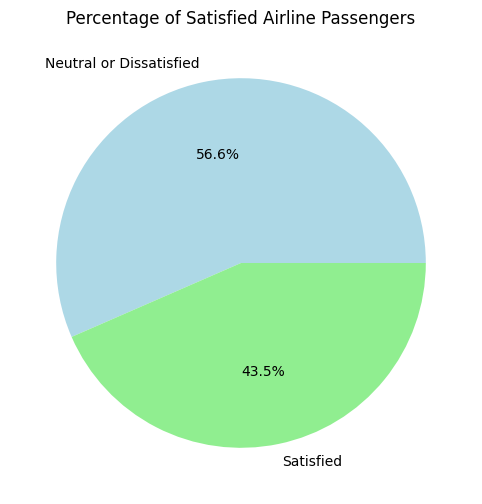

In [63]:
plt.figure(figsize=(8, 6))
satisf_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Percentage of Satisfied Airline Passengers')
plt.ylabel('')
plt.show()

The analysis shows that 43.5% of customers are satisfied with services that this airline company provides. 

Q3 

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# ensure the Flight Distance to numeric and remove all the blanks.
df['Flight Distance'] = pd.to_numeric(df['Flight Distance'], errors='coerce')
df = df.dropna(subset=['Flight Distance','Class'])

In [66]:
# Define the order from the 'Class' column
class_order = ['Economy', 'Economy Plus', 'Business']

# Reorder the 'Class' column
df['Class'] = pd.Categorical(df['Class'],categories=class_order, ordered=True)

Text(0, 0.5, 'Class')

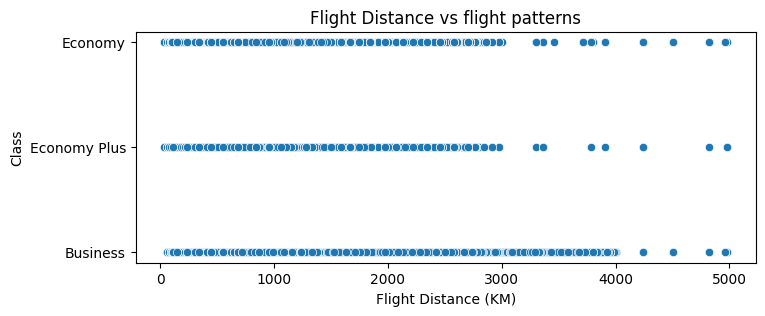

In [67]:
plt.figure(figsize=(8,3))
sns.scatterplot(x ='Flight Distance', y = 'Class',data = df)

# Add title and label
plt.title('Flight Distance vs flight patterns')
plt.xlabel('Flight Distance (KM)')
plt.ylabel('Class')

If the flight distance is less than 3000 km, the flight patterns are similar. However, for distances greater than 3000 km, a higher proportion of passengers choose business class.

Which factors contribute to customer satisfaction the most? What about dissatisfaction?

In [77]:
# Convert categorical variables to numerical if needed
df = pd.get_dummies(df, drop_first=True)

In [78]:
# Define features and target
X = df.drop('Satisfaction_Satisfied', axis=1)
y = df['Satisfaction_Satisfied']

In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier to determine feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [80]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [81]:
# Sort the dataframe by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.head(10))

                    Feature  Importance
8           Online Boarding    0.168496
16   In-flight Wifi Service    0.136094
21  Type of Travel_Personal    0.097954
23           Class_Business    0.095060
17  In-flight Entertainment    0.065359
12         Leg Room Service    0.042751
6    Ease of Online Booking    0.036639
11             Seat Comfort    0.036582
20  Customer Type_Returning    0.035764
2           Flight Distance    0.033889


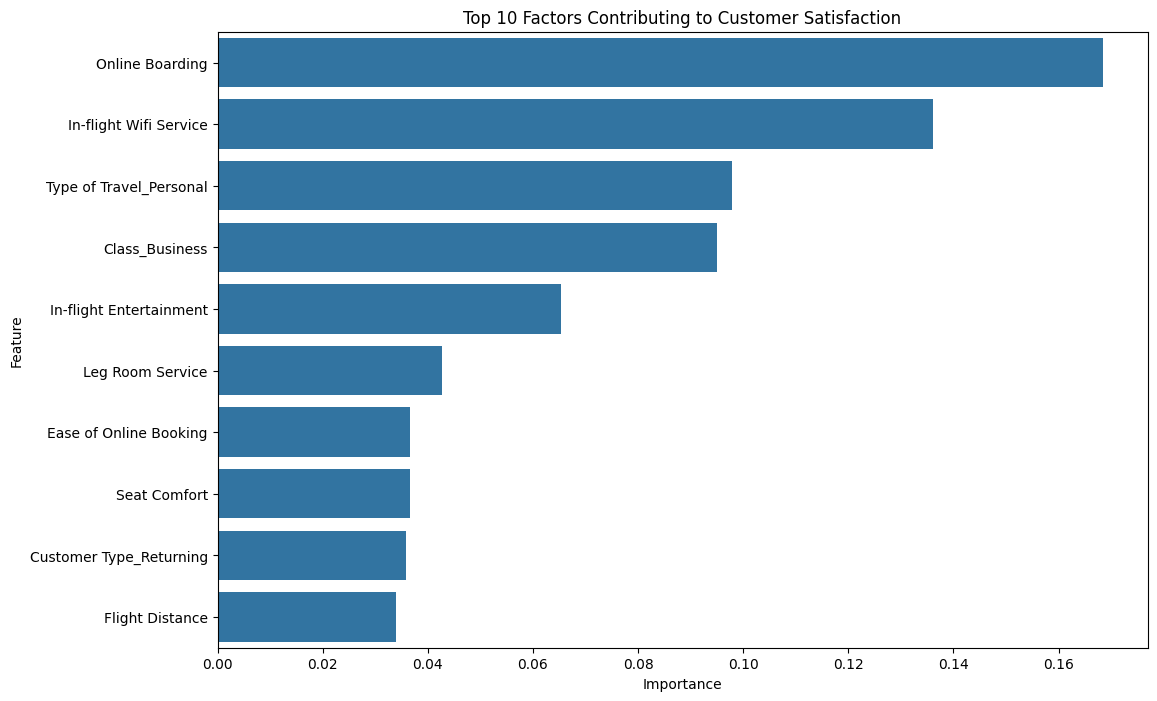

In [82]:
# Plot the top 10 features contributing to satisfaction
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Factors Contributing to Customer Satisfaction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The plot of the top 10 factors contributing to customer satisfaction shows that online borading is the most important factor, followed by in-flight wifi service and type of travel personal. These factors are critical as they directly affect the passenger experience during the flight. On the other hand, logistical factors like gate location and Departure and Arrival Time Convenience are also significant, though they might not directly impact the in-flight experience, they influence overall travel satisfaction.

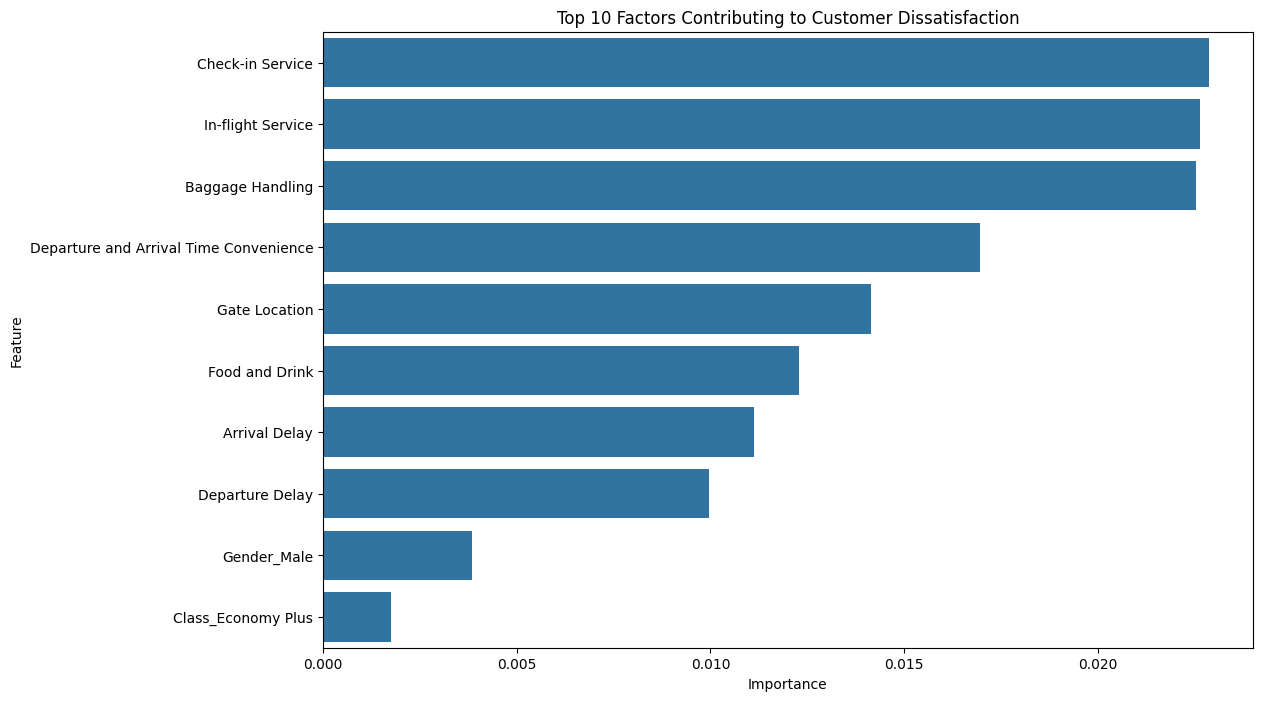

In [83]:
# Plot the least contributing factors (dissatisfaction)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.tail(10))
plt.title('Top 10 Factors Contributing to Customer Dissatisfaction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The plot of the bottom 10 factors contributing to customer dissatisfaction shows that baggage handling and check-in service are the most significant contributors to dissatisfaction. 

Baggage Handling affects passengers' travel experience by causing inconvenience and stress due to issues with luggage delivery. Ensuring reliable and efficient baggage handling processes can greatly enhance customer satisfaction.

Check-in Service sets the initial tone for the passenger’s journey. Problems at this stage can create a poor first impression and impact overall satisfaction. Improving check-in procedures, reducing wait times, and enhancing staff interactions are essential for a positive travel experience.